# Convección en una dimensión

In [1]:
%matplotlib inline

In [2]:
import scipy as np
from matplotlib import pyplot as plt

## Parámetros

In [16]:
data = np.loadtxt('initial_f.csv' , delimiter=',' )

In [17]:
x = data[ : , 0 ]
u0 = data[ : , 1 ]

In [67]:
L  = x[-1] - x[0]      # longitud del sistema 1D
nx = x.size            # nodos espaciales
dx = x[ 1] - x[0]      # equiespaciados

T= 1            # tiempo total
nt = 200            # pasos temporales
dt = T / nt

c = 1              # velocidad de la onda

### ¡Número de Courant !

In [68]:
Co = c * dt / dx
Co

0.19999999999999998

### Condiciones iniciales

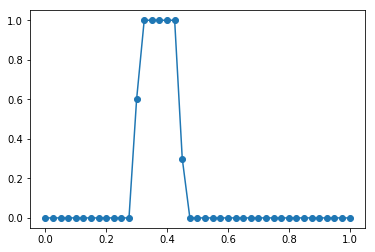

In [22]:
plt.plot( x , u0 , 'o-')

### Un paso en el tiempo

Recordemos que queremos implementar $u_i^{n+1} = u_i^n - \mathrm{Co}/2 (u_{i+1}^n-u_{i-1}^n)$

In [23]:
u = u0.copy()

In [24]:
un = u.copy()         # distribución actual


for i in range( 2 , nx - 2 ):    # Ahora queda claro por qué hemos quitado los extremos !!
   u[i] = un[i] - (Co / 2.0) * (un[i+1] - un[i-1])

        

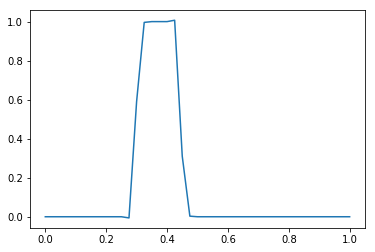

In [25]:
plt.plot(x,u)

### Condiciones cíclicas

In [26]:
u[0] = un[0] - (Co / 2.0) * (un[1] - un[ -1 ] )

u[-1] = un[-1] - (Co / 2.0) * (un[0] - un[ -2 ] )


In [28]:
i = 0
print( un[i] - (Co / 2.0) * (un[ i+1 ] - un[i-1]) )

0.0


In [32]:
print( nx )
print( 2  % nx )
print( nx  % nx )
print( ( nx + 1 )  % nx )


41
2
0
1


In [30]:
i = nx-1
print( un[i] - (Co / 2.0) * (un[ ( i+1 ) %nx ] - un[i-1]) )

0.0


In [69]:
u = u0.copy()
un = u.copy()

for i in range( 0 , nx ):
   u[i] = un[i] - (Co / 2.0) * (un[ (i+1) % nx ] - un[i-1])


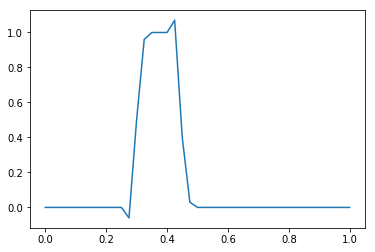

In [70]:
plt.plot(x,u)

### Tiempo completo

In [83]:
u = u0.copy()

In [84]:

for n in range(100):
    un = u.copy()
    for i in range( 0 , nx ): 
        u[i] = un[i] - (Co / 2.0) * (un[ (i+1)%nx ] - un[i-1])
        
        

In [85]:
Co

0.19999999999999998

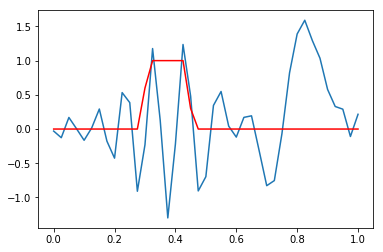

In [86]:
plt.plot(x , u , x , u0 , 'r')

### Formulaciones alternativas

¿Qué pasa si probamos el algoritmo "peor"?  $u_i^{n+1} = u_i^n - \mathrm{Co} (u_{i}^n-u_{i-1}^n)$

In [101]:
u = u0.copy()

for n in range(nt):
    un = u.copy()
    for i in range( 0 , nx ): 
        u[i] = un[i] - Co  * (un[i] - un[i-1])
        
        

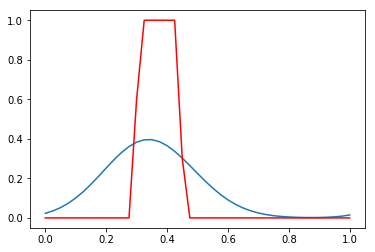

In [102]:
plt.plot(x , u , x , u0 , 'r')

### Reflexiones

* ¿Qué hemos hecho en los bordes? (condiciones de contorno)
* ¿Por qué los algoritmos difieren tantísimo?
* ¿Cuántos parámetros hay realmente? (Pista: 1)
